# Transfer learning

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_hub as hub

## Transfer learning feature extraction
> In feature extraction we freeze our pre-trained model layers and only add an output layer to it

### Part 1 : Using TensorFlow Hub to download our model
> Also we'll use `ImageDataGenerator`

In [ ]:
target_size = (224, 224)

# creating an image data generator object and doing some data augmuntation on training set
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, #scaling each pixel to 0 to 1
                                                                shear_range=0.2,
                                                                zoom_range=0.2,
                                                                horizontal_flip=True)

# now connecting the object we just created above to train directory
train_generator = train_datagen.flow_from_directory('/content/train', # traingset path directory
                                                    target_size=target_size, # images will become 224x224
                                                    batch_size=32,
                                                    class_mode='categorical') # because target is categorical "100 different categories"

# creating another image data generator object, we dont use data augumnetation on val set!
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# connecting it to test directory
val_generator = val_datagen.flow_from_directory('/content/valid',
                                                target_size=target_size,
                                                batch_size=32,
                                                class_mode='categorical')

In [ ]:
class_indices = train_generator.class_indices

# Print class indices and labels
for class_index, class_label in class_indices.items():
    print(f'Class Index: {class_index}, Class Label: {class_label}')

Downloading our model from [kaggle](Kaggle.com) and putting it in our Keras Sequential, also for feature extraction we need to add an output layer

In [ ]:
eff_model = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/efficientnet-v2/frameworks/TensorFlow2/variations/imagenet1k-b3-classification/versions/2"),
    tf.keras.layers.Dense(525, activation='softmax') #adding an activation layer
])
eff_model.build([None, 224, 224, 3])

Compiling the model

In [ ]:
eff_model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
                  metrics=['accuracy'])

Fitting the model

In [ ]:
eff_model.fit(train_generator, validation_data=val_generator, epochs=5)

In [ ]:
eff_model.evaluate(val_generator)

### Part 2 : Feature extraction using Keras Application

In [ ]:
!wget https://raw.githubusercontent.com/Yasin-Az/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-03-21 13:30:34--  https://raw.githubusercontent.com/Yasin-Az/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-03-21 13:30:34 (102 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
from helper_functions import plot_loss_curves, unzip_data, walk_through_dir

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2024-03-21 13:30:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   190MB/s    in 0.8s    

2024-03-21 13:30:40 (190 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [ ]:
unzip_data("/content/10_food_classes_10_percent.zip")

In [ ]:
walk_through_dir("/content/10_food_classes_10_percent")

There are 2 directories and 0 images in '/content/10_food_classes_10_percent'.
There are 10 directories and 0 images in '/content/10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '/content/10_food_cl

In [ ]:
train_dir = "/content/10_food_classes_10_percent/train"
test_dir = "/content/10_food_classes_10_percent/test"

Preprocessing Data using `image_dataset_from_directory` this time,

**note:** it's better than `ImageDataGenerator`

In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                 image_size=IMG_SIZE,
                                                                 label_mode="categorical",
                                                                 batch_size=BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode="categorical",
                                                                batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

## Feature extraction model

This time instead of using Sequential method we'll use keras functional method

In [ ]:
# 1. Create a base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freeze base model
base_model.trainable = False #False to freeze layers

# 3. Create input layer
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="Input_layer")

# 4. if we're using a model similar to Resnet50v2 models, we need to normolize our data (for efficientnet is NOT needed because it's built in)
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255) (inputs)

# 5. passing inputs to our base model
x = base_model(inputs)

# 6. average pool the outputs of base model
x = tf.keras.layers.GlobalAveragePooling2D(name="Global_Average_Pooling")(x)

# 7. Create activation output
outputs = tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax, name="Output_layers")(x)

# 8. combine inputs and outputs
model_0 = tf.keras.Model(inputs, outputs)

Now compiling our model

In [ ]:
model_0.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])

In [ ]:
history_model_0 = model_0.fit(train_data,
                              steps_per_epoch=len(train_data),
                              validation_data=test_data,
                              validation_steps=int( 0.25 * len(test_data)), # only validate on 25% of our test data
                              epochs=5)

Epoch 1/5
24/24 [==============================] - 18s 352ms/step - loss: 1.8740 - accuracy: 0.3867 - val_loss: 1.3211 - val_accuracy: 0.6776
Epoch 2/5
24/24 [==============================] - 5s 177ms/step - loss: 1.0860 - accuracy: 0.7680 - val_loss: 0.8796 - val_accuracy: 0.8010
Epoch 3/5
24/24 [==============================] - 5s 174ms/step - loss: 0.7849 - accuracy: 0.8280 - val_loss: 0.7177 - val_accuracy: 0.8355
Epoch 4/5
24/24 [==============================] - 4s 133ms/step - loss: 0.6404 - accuracy: 0.8547 - val_loss: 0.6206 - val_accuracy: 0.8586
Epoch 5/5
24/24 [==============================] - 4s 136ms/step - loss: 0.5408 - accuracy: 0.8800 - val_loss: 0.5689 - val_accuracy: 0.8586


In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 6s 75ms/step - loss: 0.5604 - accuracy: 0.8596


[0.5603607296943665, 0.8596000075340271]

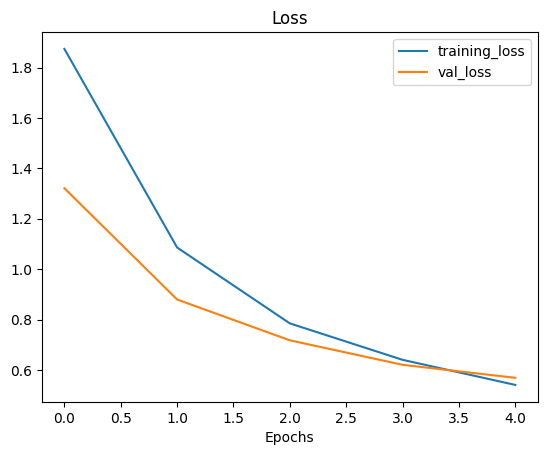

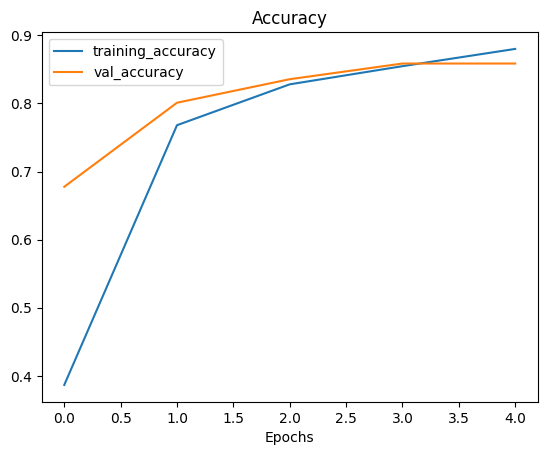

In [ ]:
plot_loss_curves(history_model_0)

## Model 1 + Built in data augmentation
**Feature Extraction**

adding data augmentation as a layer in our model has several benfitsm like gpu acceleration etc.

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
    tf.keras.layers.experimental.preprocessing.RandomWidth(0.2)
    #tf.keras.layers.experimental.preprocessing.Rescaling(1.0 / 255)  # not needed for efficientnet
], name='Data_Augmentation_layer')

Building our model :

In [ ]:
# setup input shape, base model and freezing layers
input_shape = (224, 224, 3)

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# create input layer
inputs = tf.keras.layers.Input(shape=input_shape, name="input_layer")

# Adding data augmentation sequential as a layer
x = data_augmentation(inputs)

# giving base model the augmented data as input, and seting training=false to not train it yet
x = base_model(x, training=False)

# pool output features of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name='pooling_layer')(x)

# put an activation output layer
outputs = tf.keras.layers.Dense(units=10, activation='softmax', name='output_layer')(x)

# building model
model_1 = tf.keras.Model(inputs, outputs)

In [ ]:
model_1.compile(optimizer=tf.keras.optimizers.Adam(),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# setting up a checkpoint callback, we need it later in fine-tuning part
checkpoint_path = "/checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=True, # saves only best epochs, if False it saves every epochs
                                                         save_freq="epoch", # saves every epoch
                                                         verbose=1)

In [ ]:
initial_epochs = 5

history_model_1 = model_1.fit(train_data,
                              steps_per_epoch=len(train_data),
                              validation_data=test_data,
                              validation_steps=int( 0.25 * len(test_data)), # only validate on 25% of our test data
                              epochs=initial_epochs,
                              callbacks=[checkpoint_callback])

Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9178 - accuracy: 0.3867
Epoch 1: val_loss improved from inf to 1.40425, saving model to /checkpoint.ckpt
24/24 [==============================] - 33s 1s/step - loss: 1.9178 - accuracy: 0.3867 - val_loss: 1.4043 - val_accuracy: 0.6891
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.2704 - accuracy: 0.7093
Epoch 2: val_loss improved from 1.40425 to 0.98814, saving model to /checkpoint.ckpt
24/24 [==============================] - 21s 860ms/step - loss: 1.2704 - accuracy: 0.7093 - val_loss: 0.9881 - val_accuracy: 0.7977
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.9536 - accuracy: 0.7800
Epoch 3: val_loss improved from 0.98814 to 0.78809, saving model to /checkpoint.ckpt
24/24 [==============================] - 18s 724ms/step - loss: 0.9536 - accuracy: 0.7800 - val_loss: 0.7881 - val_accuracy: 0.8273
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.8029 - a

In [ ]:
model_1.evaluate(test_data)

79/79 [==============================] - 5s 63ms/step - loss: 0.6057 - accuracy: 0.8532


[0.6057354211807251, 0.8532000184059143]

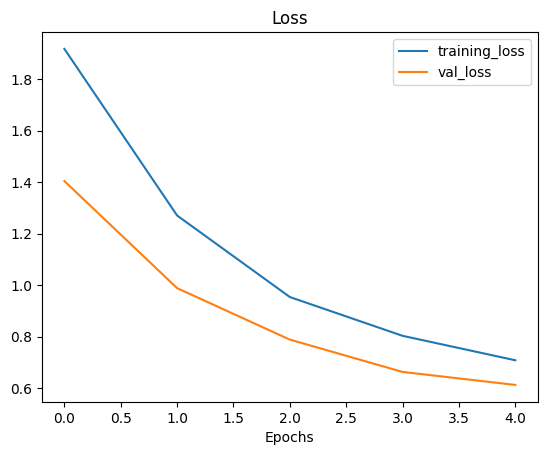

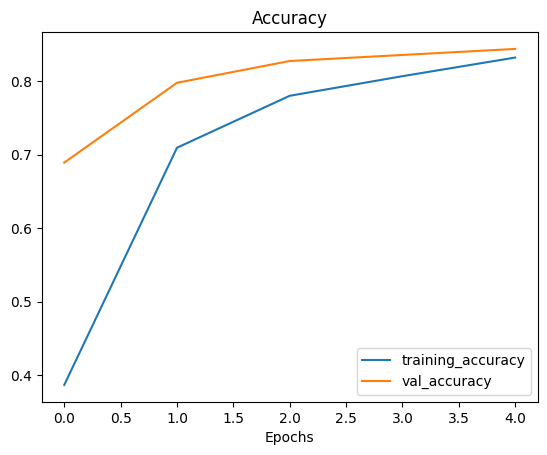

In [ ]:
plot_loss_curves(history_model_1)

# Fine-Tuning Model
> During fine-tuning we unfreeze some layers according to our problem and dataset to let them get **fine-tuned** on our data.

## Fine-tuning Workflow :
first we train our model with feature extraction and let the output layer gets the weights, then we train our model again with some layers unfreezed for fine-tuning

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2024-03-21 13:34:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  39.4MB/s    in 6.8s    

2024-03-21 13:34:16 (72.3 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [ ]:
unzip_data("/content/10_food_classes_all_data.zip")

In [ ]:
train_dir_all = "/content/10_food_classes_all_data/train"
test_dir = "/content/10_food_classes_all_data/test"

In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data_full = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_all,
                                                                      image_size=IMG_SIZE,
                                                                      label_mode="categorical",
                                                                      batch_size=BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode="categorical",
                                                                batch_size=BATCH_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


loading our model feature extraction weights to fune-tune it

In [ ]:
model_1.load_weights(checkpoint_path)

In [ ]:
# veriftying if it has been loaded
model_1.evaluate(test_data)

79/79 [==============================] - 6s 64ms/step - loss: 0.6057 - accuracy: 0.8532


[0.605735719203949, 0.8532000184059143]

In [ ]:
# first we start with make our base model trainable
base_model.trainable = True

# looping over all layers and freezing them except last 10 layers
for layer in base_model.layers[:-10]:
  base_model.trainable = False

# recompiling our model
model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), #because we don't want to our model weights change alot we decrease our learning rate(at least 10x lower)
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
fine_epochs = initial_epochs + 5

history_fine = model_1.fit(train_data_full,
                           steps_per_epoch=len(train_data_full),
                           validation_data=test_data,
                           validation_steps=int( 0.25 * len(test_data)),
                           epochs=fine_epochs,
                           initial_epoch=history_model_1.epoch[-1]) # starts training from last epoch it trained

Epoch 5/10
235/235 [==============================] - 118s 467ms/step - loss: 0.8073 - accuracy: 0.7693 - val_loss: 0.5319 - val_accuracy: 0.8684
Epoch 6/10
235/235 [==============================] - 87s 369ms/step - loss: 0.7443 - accuracy: 0.7884 - val_loss: 0.4719 - val_accuracy: 0.8931
Epoch 7/10
235/235 [==============================] - 76s 321ms/step - loss: 0.7087 - accuracy: 0.7872 - val_loss: 0.4467 - val_accuracy: 0.8898
Epoch 8/10
235/235 [==============================] - 65s 275ms/step - loss: 0.6784 - accuracy: 0.7991 - val_loss: 0.4347 - val_accuracy: 0.8964
Epoch 9/10
235/235 [==============================] - 68s 284ms/step - loss: 0.6535 - accuracy: 0.8084 - val_loss: 0.4003 - val_accuracy: 0.9030
Epoch 10/10
235/235 [==============================] - 59s 251ms/step - loss: 0.6344 - accuracy: 0.8100 - val_loss: 0.4032 - val_accuracy: 0.8931


In [ ]:
model_1.evaluate(test_data)

79/79 [==============================] - 5s 63ms/step - loss: 0.4232 - accuracy: 0.8840


[0.42317020893096924, 0.8840000033378601]

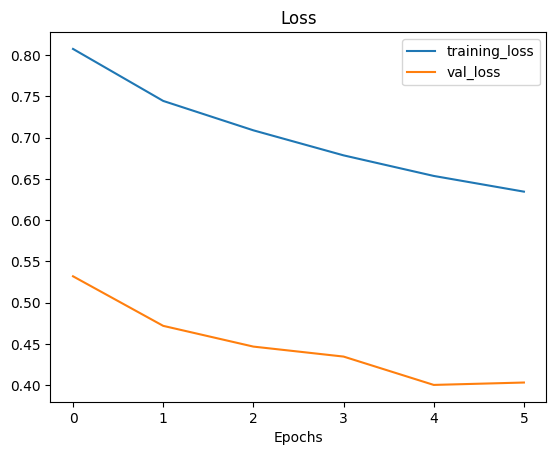

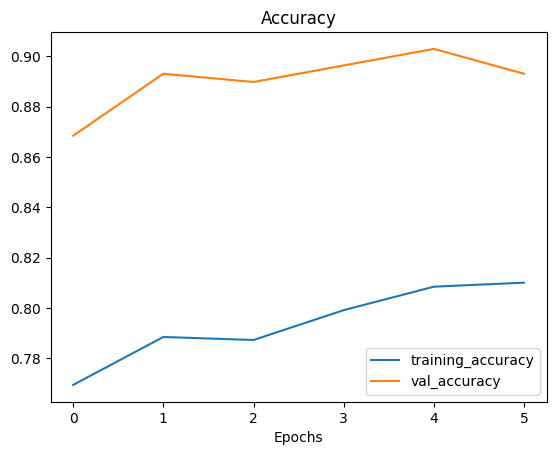

In [ ]:
plot_loss_curves(history_fine)